In [2]:
import pandas as pd
from urllib import urlretrieve
path = '/data/csv/'  # path to data folder
source = 'http://www.stoxx.com/download/historical_values/'

es_url = source + 'hbrbcpe.txt'
vs_url = source + 'h_vstoxx.txt'
urlretrieve(es_url, path + 'es.txt')  # ES50 data file
urlretrieve(vs_url, path + 'vs.txt')  # VSTOXX data file

('/data/csv/vs.txt', <httplib.HTTPMessage instance at 0x7f22ac8e1cf8>)

In [3]:
!ls $path*.txt

/data/csv/es.txt  /data/csv/vs.txt


In [4]:
with open(path + 'es.txt', 'r') as f:
    for _ in range(10):
        print f.readline(),

Price Indices - EURO Currency
Date    ;Blue-Chip;Blue-Chip;Broad    ; Broad   ;Ex UK    ;Ex Euro Zone;Blue-Chip; Broad
        ;  Europe ;Euro-Zone;Europe   ;Euro-Zone;         ;            ; Nordic  ; Nordic
        ;  SX5P   ;  SX5E   ;SXXP     ;SXXE     ; SXXF    ;    SXXA    ;    DK5F ; DKXF
31.12.1986;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56
01.01.1987;775.00 ;  900.82 ;   82.76 ;   98.58 ;   98.06 ;   69.06 ;  645.26  ;  65.56
02.01.1987;770.89 ;  891.78 ;   82.57 ;   97.80 ;   97.43 ;   69.37 ;  647.62  ;  65.81
05.01.1987;771.89 ;  898.33 ;   82.82 ;   98.60 ;   98.19 ;   69.16 ;  649.94  ;  65.82
06.01.1987;775.92 ;  902.32 ;   83.28 ;   99.19 ;   98.83 ;   69.50 ;  652.49  ;  66.06
07.01.1987;781.21 ;  899.15 ;   83.78 ;   98.96 ;   98.62 ;   70.59 ;  651.97  ;  66.20


In [5]:
# new column names (without white space)
# addition column 'DEL' -- to be deleted after parsing
columns = ['Date', 'SX5P', 'SX5E', 'SXXP', 'SXXE',
           'SXXF', 'SXXA', 'DK5F', 'DKXF', 'DEL']

es = pd.read_csv(path + 'es.txt',  # filename
                 index_col=0,  # index column (dates)
                 parse_dates=True,  # parse date information
                 dayfirst=True,  # day before month
                 header=None,  # ignore header information
                 skiprows=4,  # ignore first 4 rows
                 names=columns,  # use custom column names
                 sep=';')  # separator character

del es['DEL']  # deletes helper column

es.to_csv(path + 'es.csv')  # saves cleaned-up data

es.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7673 entries, 1986-12-31 to 2016-10-04
Data columns (total 8 columns):
SX5P    7673 non-null float64
SX5E    7673 non-null float64
SXXP    7673 non-null float64
SXXE    7673 non-null float64
SXXF    7673 non-null float64
SXXA    7673 non-null float64
DK5F    7673 non-null float64
DKXF    7673 non-null float64
dtypes: float64(8)
memory usage: 539.5 KB


In [7]:
with open(path + 'vs.txt', 'r') as f:
    for _ in range(10):
        print f.readline(),

EURO STOXX 50 Volatility Indices,,,,,,,,,
 ,VSTOXX,Sub-Index 1M,Sub-Index 2M,Sub-Index 3M,Sub-Index 6M,Sub-Index 9M,Sub-Index 12M,Sub-Index 18M,Sub-Index 24M
Date,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
04.01.1999,18.2033,21.2458,17.5555,31.2179,33.3124,33.7327,33.2232,31.8535,23.8209
05.01.1999,29.6912,36.6400,28.4274,32.6922,33.7326,33.1724,32.8457,32.2904,25.0532
06.01.1999,25.1670,25.4107,25.1351,32.2186,32.6459,31.9673,32.9260,33.2871,26.0107
07.01.1999,32.5205,35.4410,32.2004,36.1265,34.5150,33.1095,33.2843,33.7269,26.2205
08.01.1999,33.2296,35.8846,33.0020,36.0813,36.3964,33.4658,33.4837,33.9227,26.3672
11.01.1999,36.8411,46.9742,36.4643,39.9139,38.0755,34.6165,34.4576,34.6615,26.6732
12.01.1999,37.5664,48.6277,37.2998,40.5525,38.7981,35.0575,37.5290,36.5965,28.0273


In [8]:
vs = pd.read_csv(path + 'vs.txt',  # filename
                 index_col=0,  # index column (dates)
                 parse_dates=True,  # parse date information
                 dayfirst=True, # day before month
                 header=2)  # header/column names

vs.to_csv(path + 'vs.csv')  # saves cleaned-up data

vs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4357 entries, 1999-01-04 to 2016-02-12
Data columns (total 9 columns):
V2TX    4357 non-null float64
V6I1    3906 non-null float64
V6I2    4357 non-null float64
V6I3    4296 non-null float64
V6I4    4357 non-null float64
V6I5    4357 non-null float64
V6I6    4340 non-null float64
V6I7    4357 non-null float64
V6I8    4343 non-null float64
dtypes: float64(9)
memory usage: 340.4 KB


In [9]:
import datetime as dt

data = pd.DataFrame({'EUROSTOXX' :
            es['SX5E'][es.index > dt.datetime(1999, 1, 1)],
                   'VSTOXX' : 
            vs['V2TX'][vs.index > dt.datetime(1999, 1, 1)]})

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4555 entries, 1999-01-04 to 2016-10-04
Data columns (total 2 columns):
EUROSTOXX    4554 non-null float64
VSTOXX       4357 non-null float64
dtypes: float64(2)
memory usage: 106.8 KB


In [10]:
print es.ix[:10].to_string()

print vs.ix[:10].to_string()

print data.ix[:10].to_string()

              SX5P    SX5E   SXXP   SXXE   SXXF   SXXA    DK5F   DKXF
Date                                                                 
1986-12-31  775.00  900.82  82.76  98.58  98.06  69.06  645.26  65.56
1987-01-01  775.00  900.82  82.76  98.58  98.06  69.06  645.26  65.56
1987-01-02  770.89  891.78  82.57  97.80  97.43  69.37  647.62  65.81
1987-01-05  771.89  898.33  82.82  98.60  98.19  69.16  649.94  65.82
1987-01-06  775.92  902.32  83.28  99.19  98.83  69.50  652.49  66.06
1987-01-07  781.21  899.15  83.78  98.96  98.62  70.59  651.97  66.20
1987-01-08  777.62  887.37  83.52  97.87  97.68  71.01  645.57  65.62
1987-01-09  769.80  868.31  83.03  96.31  96.22  71.40  638.03  65.14
1987-01-12  775.07  879.41  83.64  97.54  97.18  71.50  634.14  65.03
1987-01-13  770.00  872.74  83.00  96.78  96.38  70.97  622.44  63.87
               V2TX     V6I1     V6I2     V6I3     V6I4     V6I5     V6I6     V6I7     V6I8
Date                                                                

In [11]:
h5 = pd.HDFStore(path + 'es_vs_data.h5', 'w')
h5['es'] = es
h5['vs'] = vs
h5['data'] = data
h5
h5.close()

In [12]:
h5 = pd.HDFStore(path  + 'es_vs_data.h5', 'r')

es = h5['es']

vs = h5['vs']

data = h5['data']

h5.close()

In [13]:
data.describe()

,EUROSTOXX,VSTOXX
count,4554.000000,4357.000000
mean,3251.332058,25.243332
std,758.397022,9.651606
min,0.000000,11.596600
25%,2708.130000,18.699200
50%,3060.515000,23.219200
75%,3700.275000,28.382700
max,5464.430000,87.512700


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22a7525190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f22a74b7850>], dtype=object)

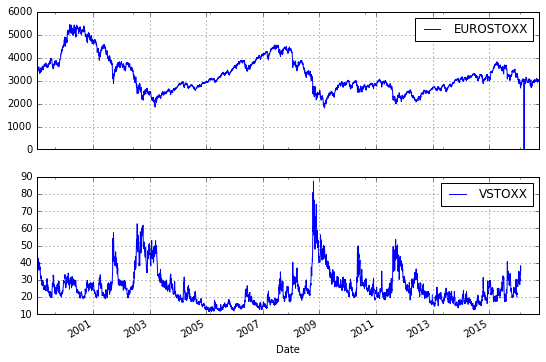

In [14]:
%matplotlib inline
data.plot(subplots=True,  # generate sub-plots per column
              figsize=(9, 6),  # sizing of the figure
              color='blue',  # color to plot the data
              grid=True)  # plot a grid

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22a72da350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f22a4a30910>]], dtype=object)

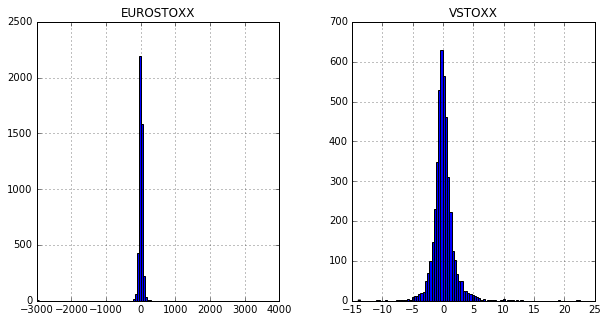

In [15]:
data.diff().hist(figsize=(10, 5),  # figure sizing
                 color='blue',  # color for the plotted data
                 bins=100)  # number of bins to be used

In [16]:
print data.pct_change().ix[:10]

            EUROSTOXX    VSTOXX
Date                           
1999-01-04        NaN       NaN
1999-01-05   0.017377  0.631089
1999-01-06   0.022385 -0.152375
1999-01-07  -0.015600  0.292188
1999-01-08  -0.003115  0.021805
1999-01-11  -0.019402  0.108683
1999-01-12  -0.012413  0.019687
1999-01-13  -0.047376  0.057788
1999-01-14   0.008686 -0.015099
1999-01-15   0.018016 -0.011835


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f22a3b62c10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f22a3681390>]], dtype=object)

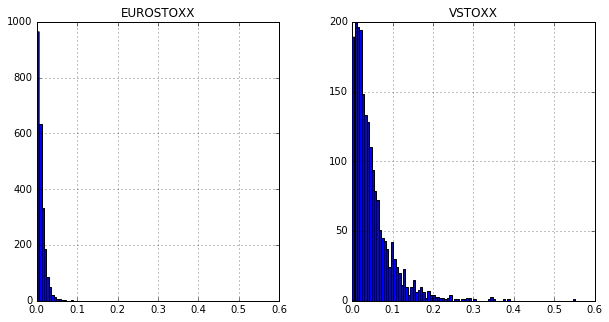

In [22]:
data.pct_change().hist(figsize=(10, 5),
                       color='blue', 
                       bins=100, range=(0,0.6))

In [23]:
import numpy as np

log_rets = np.log(data / data.shift(1))

print log_rets.ix[:10].to_string()

            EUROSTOXX    VSTOXX
Date                           
1999-01-04        NaN       NaN
1999-01-05   0.017228  0.489248
1999-01-06   0.022138 -0.165317
1999-01-07  -0.015723  0.256337
1999-01-08  -0.003120  0.021570
1999-01-11  -0.019593  0.103173
1999-01-12  -0.012490  0.019496
1999-01-13  -0.048535  0.056180
1999-01-14   0.008648 -0.015214
1999-01-15   0.017855 -0.011906


/home/david/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22a3575f50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f22a30b7e50>], dtype=object)

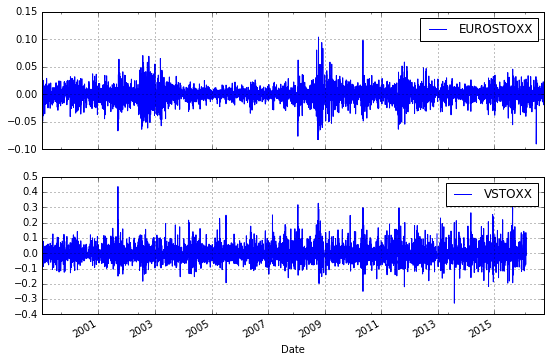

In [24]:
log_rets.plot(subplots=True,
              figsize=(9, 6),
              color='blue',
              grid=True)

In [25]:
log_rets.corr()


,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.739046
VSTOXX,-0.739046,1.000000


In [26]:
log_rets['EUROSTOXX'].corr(log_rets['VSTOXX'])

-0.73904622437635104

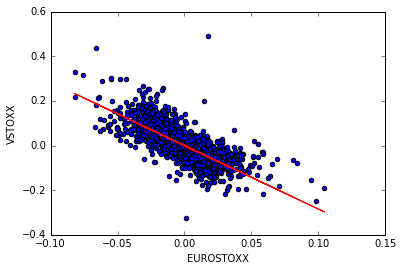

In [27]:
import matplotlib.pyplot as plt
# plot log returns as scatter plot
log_rets.plot(x='EUROSTOXX', y='VSTOXX', kind='scatter')

# delete NaN values
log_rets = log_rets.dropna()

# make linear regression
p = np.polyfit(log_rets['EUROSTOXX'].values,
               log_rets['VSTOXX'].values,
               deg=1)

# plot the regression line
plt.plot(log_rets['EUROSTOXX'], 
         np.polyval(p, log_rets['EUROSTOXX']), 'r')


/home/david/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=252).corr(other=<Series>)
  app.launch_new_instance()


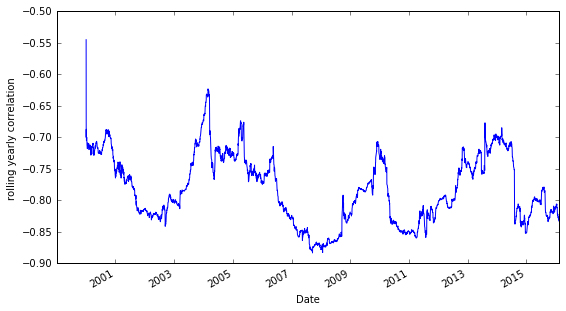

In [28]:
pd.rolling_corr(log_rets['EUROSTOXX'],
                log_rets['VSTOXX'],
                window=252).plot(figsize=(9, 5))
plt.ylabel('rolling yearly correlation')